In [87]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_bloch_multivector
from math import pi

In [88]:
alice_q = QuantumRegister(1, "alice_q")
temp_q = QuantumRegister(1, "temp_q")
bob_q = QuantumRegister(1, "bob_q")

c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")

quantum_circut = QuantumCircuit(bob_q, temp_q, alice_q, c1, c2)

Changing the state of Alice's Qubit and will teleport it to bob.

In [89]:
theta = pi*(1/4)
quantum_circut.ry(theta, alice_q)

In [90]:
backend = Aer.get_backend('statevector_simulator')
result = execute(quantum_circut, backend).result()
psi = result.get_statevector()

Status of Q-bits before teleporting:


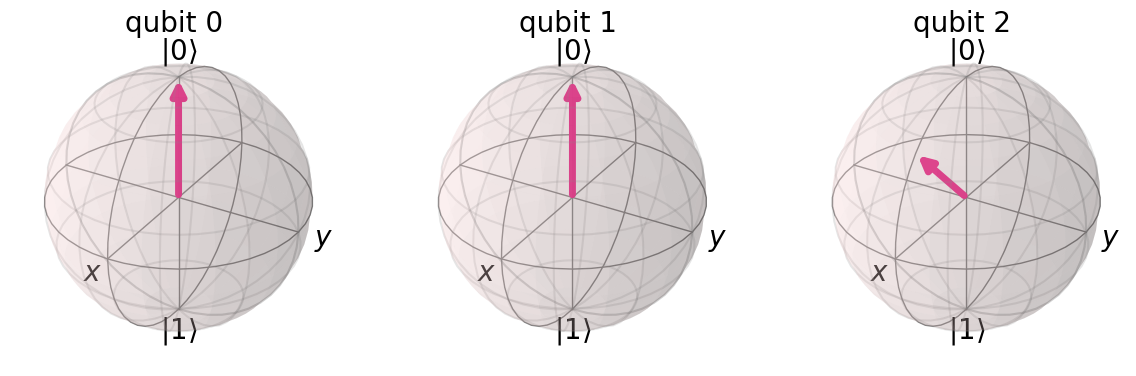

In [91]:
print("Status of Q-bits before teleporting:")
display(plot_bloch_multivector(psi))

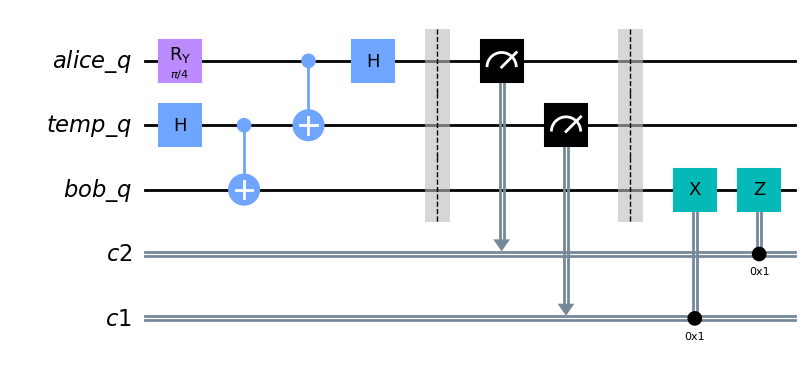

In [92]:
quantum_circut.h(temp_q)
quantum_circut.cx(temp_q, bob_q)

quantum_circut.cx(alice_q, temp_q)

quantum_circut.h(alice_q)

quantum_circut.barrier()

## Taking the measurement of Temp and Alice's Qubit on classical bits 
## and passing it Bob via Classical channel

quantum_circut.measure(alice_q, c2)
quantum_circut.measure(temp_q, c1)

quantum_circut.barrier()

## Bob's end

quantum_circut.x(bob_q).c_if(c1,1)
quantum_circut.z(bob_q).c_if(c2,1)

display(quantum_circut.draw(output="mpl", reverse_bits=True))

Status of Q-bits after teleporting:


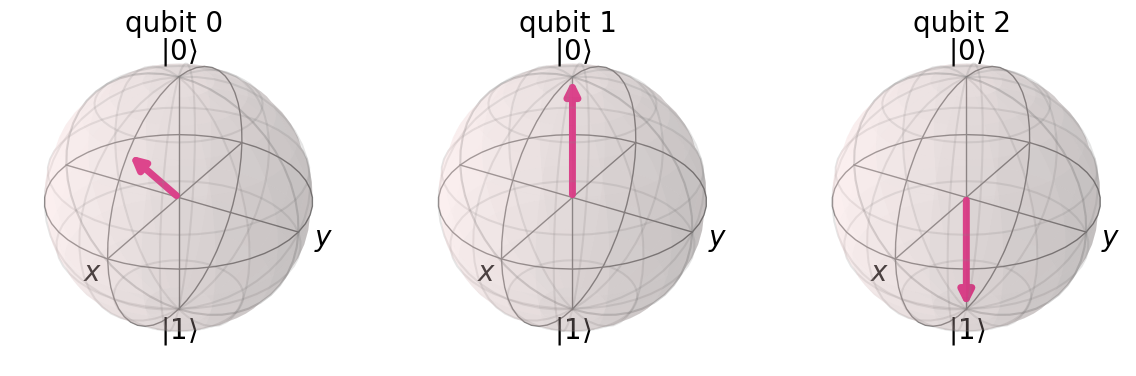

In [93]:
backend = Aer.get_backend('statevector_simulator')
result = execute(quantum_circut, backend).result()
psi = result.get_statevector()

print("Status of Q-bits after teleporting:")
display(plot_bloch_multivector(psi))